<a href="https://colab.research.google.com/github/ma850419/Various_scripts/blob/main/distance_compute_2_points_on_earth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    r = 6371 # Radius of Earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

# Example usage
lon1, lat1 = -73.935242, 40.730610  # Coordinates for New York City, NY
lon2, lat2 = 36, 34  # Coordinates for Lebanon
distance = haversine(lon1, lat1, lon2, lat2)
print(f"The distance between points is {distance} km")


The distance between points is 9043.92766321861 km


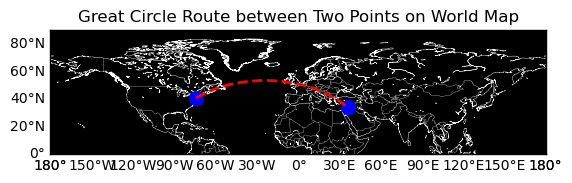

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Define the coordinates of the two points
lon1, lat1 = -73.935242, 40.730610  # New York City
lon2, lat2 = 36, 34  # Coordinates for Lebanon

# Define latitude and longitude limits for the map
latitude_min, latitude_max = 0, 90
longitude_min, longitude_max = -180, 180

# Create the map
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=latitude_min, urcrnrlat=latitude_max,
            llcrnrlon=longitude_min, urcrnrlon=longitude_max)

m.drawmapboundary(fill_color='black')
m.drawcoastlines(linewidth=0.3, color='white')
m.drawcountries(linewidth=0.2, color='white')

# Draw parallels (latitude lines) and meridians (longitude lines)
parallels = np.arange(latitude_min, latitude_max + 1, 20)
m.drawparallels(parallels, labels=[True, False, False, False], linewidth=0.3)
meridians = np.arange(longitude_min, longitude_max + 1, 30)
m.drawmeridians(meridians, labels=[False, False, False, True], linewidth=0.3)

# Plot the points
m.plot(lon1, lat1, 'bo', markersize=10)  # Blue dot for New York City
m.plot(lon2, lat2, 'bo', markersize=10)  # Blue dot for Manhattan

# Plot the great circle route between the points
m.drawgreatcircle(lon1, lat1, lon2, lat2, color='red', linestyle='--', linewidth=2)  # Great circle in red, dotted line

# Set plot title
plt.title('Great Circle Route between Two Points on World Map')

# Show plot
plt.show()
